# Predicting Ads Click-Through Rate (CTR)

## Introduction

- Click-Through Rate (CTR) prediction is a fundamental task in online advertising. The main objective is to estimate the probability that a user will click on a given advertisement. Accurate CTR prediction is essential for optimizing ad campaigns, allowing advertisers to allocate resources efficiently, target specific audience segments, and maximize return on investment (ROI). Machine learning techniques are often employed for this task due to their ability to process large datasets and identify intricate patterns that help forecast user behavior.

## Installing and Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import xgboost as xgb
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from faker import Faker
import matplotlib.pyplot as plt
import joblib
import sys
import os

In [2]:
if('google.colab' in sys.modules):
    from google.colab import drive
    drive.mount('/content/drive', force_remount = True)
    DIR = '/content/drive/MyDrive/CTR_Project'
    DATA_DIR = DIR + '/Data/'
    os.chdir(DIR)
else:
    DATA_DIR = 'data/'

## Loading and Exploring the Dataset

In [3]:
# Load the dataset
data = pd.read_csv(DATA_DIR + 'combined_dataset.csv')
data.head()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Gender,Country,Timestamp,Clicked on Ad
0,62.26,32.0,69481.85,172.83,Decentralized real-time circuit,Lisafort,Male,Svalbard & Jan Mayen Islands,2016-06-09 21:43:05,0
1,41.73,31.0,61840.26,207.17,Optional full-range projection,West Angelabury,Male,Singapore,2016-01-16 17:56:05,0
2,44.40,30.0,57877.15,172.83,Total 5thgeneration standardization,Reyesfurt,Female,Guadeloupe,2016-06-29 10:50:45,0
3,59.88,28.0,56180.93,207.17,Balanced empowering success,New Michael,Female,Zambia,2016-06-21 14:32:32,0
4,49.21,30.0,54324.73,201.58,Total 5thgeneration standardization,West Richard,Female,Qatar,2016-07-21 10:54:35,1


## Datetime Conversion

In [7]:
# Convert 'Timestamp' column to datetime type
data['Timestamp'] = pd.to_datetime(data['Timestamp'])

# Extract hour, day, and month from timestamp
data['Hour'] = data['Timestamp'].dt.hour
data['Day'] = data['Timestamp'].dt.day
data['Month'] = data['Timestamp'].dt.month

## Encoding Categorical Features

In [8]:
# Store unique cities and countries before encoding
unique_cities = data['City'].unique()
unique_countries = data['Country'].unique()

# Initialize label encoders for categorical variables
label_encoders = {}

# Encode categorical variables
for col in ['City', 'Gender', 'Country']:
    label_encoders[col] = LabelEncoder()
    data[col] = label_encoders[col].fit_transform(data[col])

data.head()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Gender,Country,Timestamp,Clicked on Ad,Hour,Day,Month
0,62.26,32.0,69481.85,172.83,Decentralized real-time circuit,234,1,174,2016-06-09 21:43:05,0,21,9,6
1,41.73,31.0,61840.26,207.17,Optional full-range projection,460,1,166,2016-01-16 17:56:05,0,17,16,1
2,44.40,30.0,57877.15,172.83,Total 5thgeneration standardization,379,0,71,2016-06-29 10:50:45,0,10,29,6
3,59.88,28.0,56180.93,207.17,Balanced empowering success,269,0,205,2016-06-21 14:32:32,0,14,21,6
4,49.21,30.0,54324.73,201.58,Total 5thgeneration standardization,495,0,149,2016-07-21 10:54:35,1,10,21,7


# Feature Selection and Target Variable Definition

In [9]:
# Concatenate numerical and timestamp features
X = data.drop(['Clicked on Ad', 'Ad Topic Line', 'Timestamp'], axis=1)
y = data['Clicked on Ad']

# Splitting the Dataset into Training and Testing Sets

In [10]:
# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Training the XGBoost Classifier

In [11]:
# Train an XGBClassifier
clf_xgb = xgb.XGBClassifier(n_estimators=200, random_state=42)  # Use XGBClassifier
clf_xgb.fit(X_train, y_train)

,objective,'binary:logistic'
,base_score,None
,booster,None
,callbacks,None
,colsample_bylevel,None
,colsample_bynode,None
,colsample_bytree,None
,device,None
,early_stopping_rounds,None
,enable_categorical,False
,eval_metric,None


# Model Evaluation and Accuracy Calculation

In [12]:
# Evaluate the model
y_pred = clf_xgb.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)


Accuracy: 0.66925


# Generating the Classification Report

In [13]:
# Compute classification report
class_report = classification_report(y_test, y_pred, output_dict=True)
class_report_df = pd.DataFrame(class_report).transpose()

# Print classification report in DataFrame
print("\nClassification Report:")
print(class_report_df)

# Print confusion matrix
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))


Classification Report:
              precision    recall  f1-score     support
0              0.669520  0.691552  0.680358  2036.00000
1              0.668951  0.646130  0.657343  1964.00000
accuracy       0.669250  0.669250  0.669250     0.66925
macro avg      0.669235  0.668841  0.668850  4000.00000
weighted avg   0.669240  0.669250  0.669057  4000.00000

Confusion Matrix:
[[1408  628]
 [ 695 1269]]


## Feature Importance

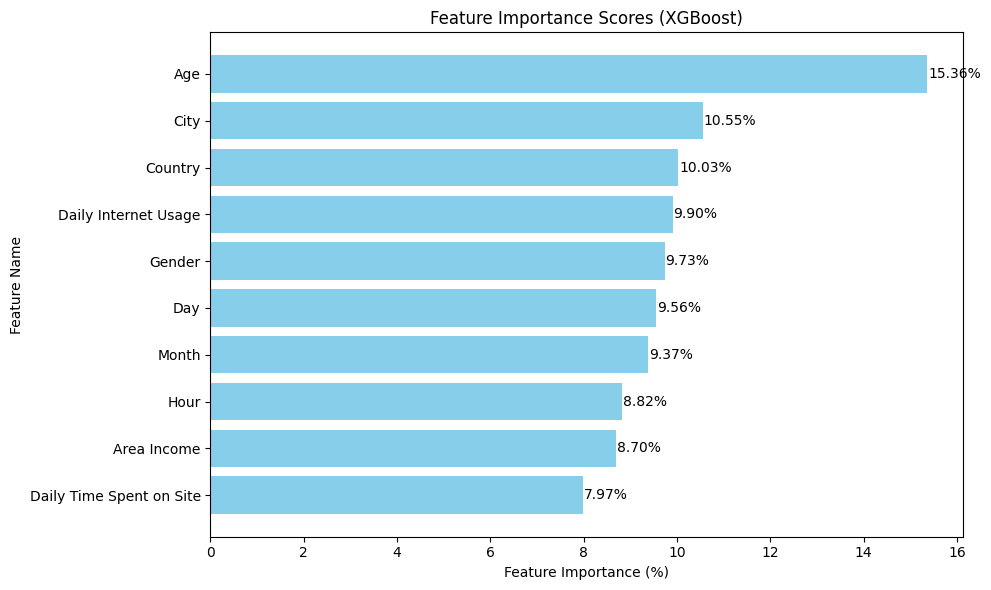

In [14]:
# Get and sort feature importances
feature_importances = clf_xgb.feature_importances_
feature_names = X_train.columns
total_importance = sum(feature_importances)  # Calculate total importance

# Calculate percentage importances
percentage_importances = (feature_importances / total_importance) * 100
feature_importance_df = pd.DataFrame({'feature': feature_names, 'importance': percentage_importances})
feature_importance_df = feature_importance_df.sort_values(by='importance', ascending=False)

# Create feature importance visualization with percentages
plt.figure(figsize=(10, 6))  # Adjust figure size as needed
plt.barh(feature_importance_df['feature'], feature_importance_df['importance'], color='skyblue')
plt.xlabel('Feature Importance (%)')
plt.ylabel('Feature Name')
plt.title('Feature Importance Scores (XGBoost)')
plt.gca().invert_yaxis()  # Invert y-axis to display most important features on top

# Add percentage labels on top of bars
for i, v in enumerate(feature_importance_df['importance']):
    plt.text(v + 0.02, i, f"{v:.2f}%", va='center')  # Adjust offset for better positioning

plt.tight_layout()
plt.show()

## LGBM Classifier


[LightGBM] [Info] Number of positive: 7822, number of negative: 8178
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000684 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1508
[LightGBM] [Info] Number of data points in the train set: 16000, number of used features: 10
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.488875 -> initscore=-0.044507
[LightGBM] [Info] Start training from score -0.044507

🔹 LightGBM Classifier Results 🔹
Accuracy: 0.6687

Classification Report:
              precision    recall  f1-score     support
0              0.665118  0.703340  0.683695  2036.00000
1              0.672983  0.632892  0.652322  1964.00000
accuracy       0.668750  0.668750  0.668750     0.66875
macro avg      0.669051  0.668116  0.668009  4000.00000
weighted avg   0.668980  0.668750  0.668291  4000.00000

Confusion Matrix:
[[1432  604]
 [ 721 1243]]


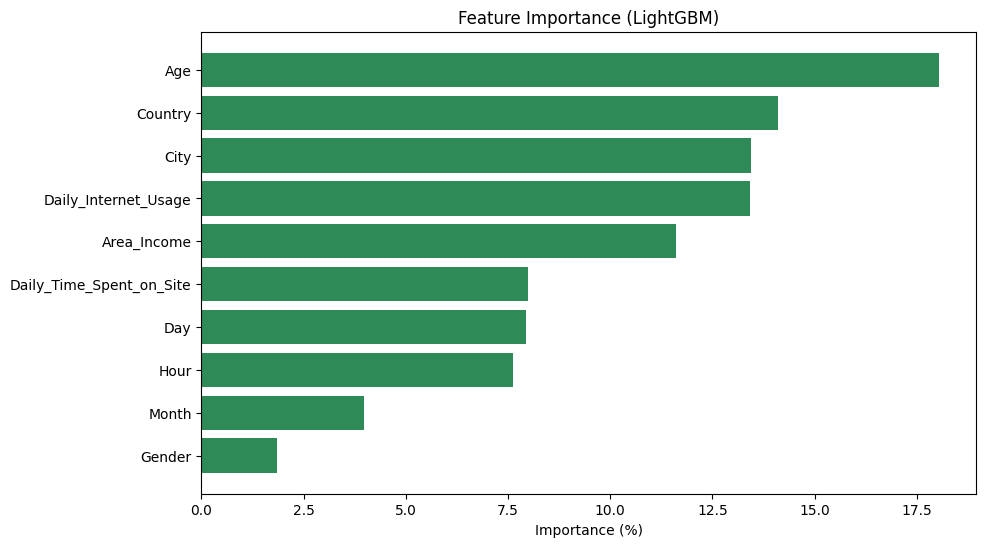

In [15]:
from lightgbm import LGBMClassifier

# FIX COLUMN NAMES FOR LIGHTGBM
X_lgbm = X.copy()
X_lgbm.columns = X_lgbm.columns.str.replace(" ", "_")

# Replace X with X_lgbm for LGBM model only
# Re-split after renaming columns
X_train_lgbm, X_test_lgbm, y_train_lgbm, y_test_lgbm = train_test_split(
    X_lgbm, y, test_size=0.2, random_state=42
)

lgbm_model = LGBMClassifier(n_estimators=200, learning_rate=0.05, random_state=42)
lgbm_model.fit(X_train_lgbm, y_train_lgbm)

# Predict
y_pred_lgbm = lgbm_model.predict(X_test_lgbm)

# Evaluate
print("\n🔹 LightGBM Classifier Results 🔹")
print("Accuracy:", round(accuracy_score(y_test_lgbm, y_pred_lgbm), 4))

# Classification report
lgbm_report = pd.DataFrame(classification_report(
    y_test_lgbm, y_pred_lgbm, output_dict=True)).transpose()
print("\nClassification Report:")
print(lgbm_report)

# Confusion matrix
print("\nConfusion Matrix:")
print(confusion_matrix(y_test_lgbm, y_pred_lgbm))

# FEATURE IMPORTANCE
feature_names = X_lgbm.columns

lgbm_importances = lgbm_model.feature_importances_
lgbm_importances = (lgbm_importances / sum(lgbm_importances)) * 100

lgbm_feat_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance (%)': lgbm_importances
}).sort_values(by='Importance (%)', ascending=False)

# Plot
plt.figure(figsize=(10,6))
plt.barh(lgbm_feat_df['Feature'], lgbm_feat_df['Importance (%)'], color='seagreen')
plt.gca().invert_yaxis()
plt.title("Feature Importance (LightGBM)")
plt.xlabel("Importance (%)")
plt.show()


## Ada Boost Classifier


🔹 AdaBoost Classifier Results 🔹
Accuracy: 0.634

Classification Report:
              precision    recall  f1-score   support
0              0.625439  0.700393  0.660797  2036.000
1              0.645349  0.565173  0.602606  1964.000
accuracy       0.634000  0.634000  0.634000     0.634
macro avg      0.635394  0.632783  0.631701  4000.000
weighted avg   0.635215  0.634000  0.632225  4000.000

Confusion Matrix:
[[1426  610]
 [ 854 1110]]


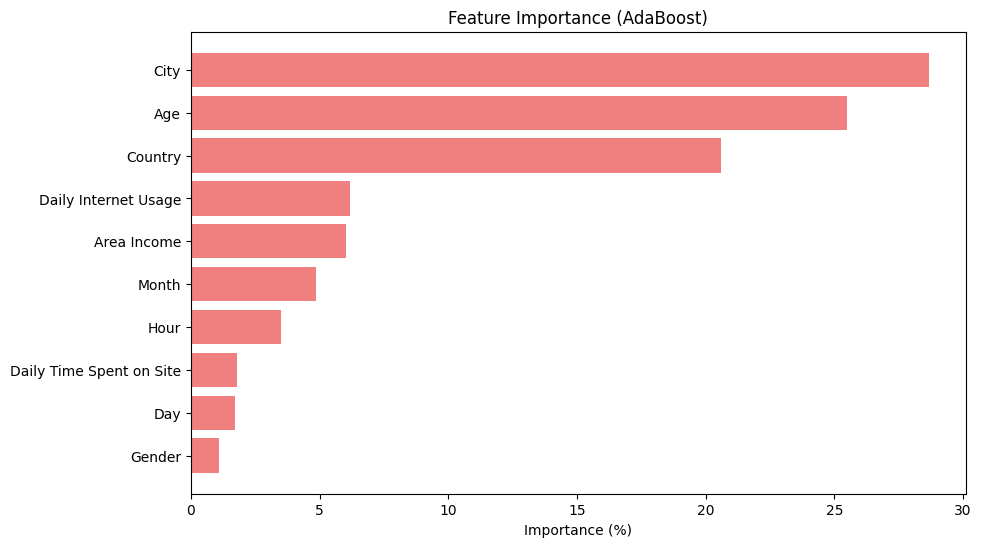

In [16]:

from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import pandas as pd
import matplotlib.pyplot as plt

# Initialize and train AdaBoost
ada_model = AdaBoostClassifier(n_estimators=100, random_state=42)
ada_model.fit(X_train, y_train)

# Predict on test set
y_pred_ada = ada_model.predict(X_test)

# Evaluate
print("\n🔹 AdaBoost Classifier Results 🔹")
print("Accuracy:", round(accuracy_score(y_test, y_pred_ada), 4))

# Classification report
ada_report = pd.DataFrame(classification_report(y_test, y_pred_ada, output_dict=True)).transpose()
print("\nClassification Report:")
print(ada_report)

# Confusion matrix
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred_ada))

# Feature Importance
ada_importances = ada_model.feature_importances_ * 100
ada_feat_df = pd.DataFrame({'Feature': X_train.columns, 'Importance (%)': ada_importances})
ada_feat_df = ada_feat_df.sort_values(by='Importance (%)', ascending=False)

plt.figure(figsize=(10,6))
plt.barh(ada_feat_df['Feature'], ada_feat_df['Importance (%)'], color='lightcoral')
plt.gca().invert_yaxis()
plt.title("Feature Importance (AdaBoost)")
plt.xlabel("Importance (%)")
plt.show()


## Random Forest Classifier


🔹 Random Forest Classifier Results 🔹
Accuracy: 0.6635

Classification Report:
              precision    recall  f1-score    support
0              0.659722  0.699902  0.679218  2036.0000
1              0.667935  0.625764  0.646162  1964.0000
accuracy       0.663500  0.663500  0.663500     0.6635
macro avg      0.663829  0.662833  0.662690  4000.0000
weighted avg   0.663755  0.663500  0.662988  4000.0000

Confusion Matrix:
[[1425  611]
 [ 735 1229]]


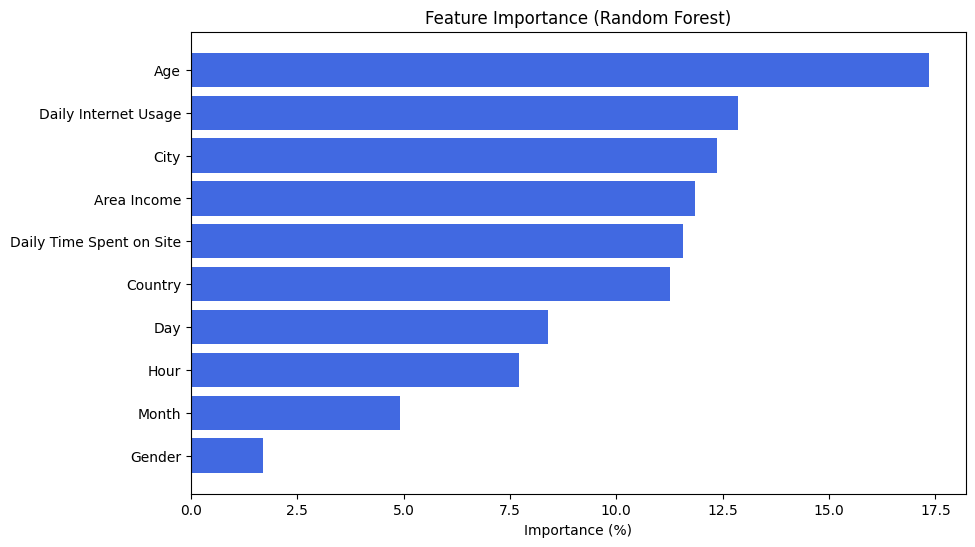

In [17]:

from sklearn.ensemble import RandomForestClassifier

# Initialize and train Random Forest
rf_model = RandomForestClassifier(n_estimators=200, random_state=42)
rf_model.fit(X_train, y_train)

# Predict
y_pred_rf = rf_model.predict(X_test)

# Evaluate
print("\n🔹 Random Forest Classifier Results 🔹")
print("Accuracy:", round(accuracy_score(y_test, y_pred_rf), 4))

# Classification report
rf_report = pd.DataFrame(classification_report(y_test, y_pred_rf, output_dict=True)).transpose()
print("\nClassification Report:")
print(rf_report)

# Confusion matrix
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred_rf))

# Feature Importance
rf_importances = rf_model.feature_importances_ * 100
rf_feat_df = pd.DataFrame({'Feature': X_train.columns, 'Importance (%)': rf_importances})
rf_feat_df = rf_feat_df.sort_values(by='Importance (%)', ascending=False)

plt.figure(figsize=(10,6))
plt.barh(rf_feat_df['Feature'], rf_feat_df['Importance (%)'], color='royalblue')
plt.gca().invert_yaxis()
plt.title("Feature Importance (Random Forest)")
plt.xlabel("Importance (%)")
plt.show()


## K-Fold Cross Validation for ML Models

In [18]:
import warnings
warnings.filterwarnings("ignore", category=UserWarning)
warnings.filterwarnings("ignore", category=FutureWarning)

from sklearn.model_selection import KFold, cross_val_score
from sklearn.ensemble import AdaBoostClassifier, RandomForestClassifier
from lightgbm import LGBMClassifier
import xgboost as xgb
import numpy as np
import pandas as pd

# Clean column names for LightGBM (avoid whitespace warning)
X_lgbm = X.copy()
X_lgbm.columns = X_lgbm.columns.str.replace(" ", "_")

# Define models (cleaned parameters)
models = {
    "XGBoost": xgb.XGBClassifier(
        n_estimators=100,
        random_state=42,
        eval_metric='logloss',   # Proper replacement for deprecated label encoder
        verbosity=0              # Suppress training logs
    ),
    "AdaBoost": AdaBoostClassifier(n_estimators=100, random_state=42),
    "LightGBM": LGBMClassifier(
        n_estimators=200,
        learning_rate=0.05,
        random_state=42,
        verbose=-1               # Turn off LightGBM info logs
    ),
    "Random Forest": RandomForestClassifier(n_estimators=200, random_state=42)
}

# Configure K-Fold
kfold = KFold(n_splits=5, shuffle=True, random_state=42)

# Evaluate models
results = {}
for name, model in models.items():
    if name == "LightGBM":
        cv_scores = cross_val_score(model, X_lgbm, y, cv=kfold, scoring='accuracy')
    else:
        cv_scores = cross_val_score(model, X, y, cv=kfold, scoring='accuracy')

    results[name] = {
        'Mean Accuracy': np.mean(cv_scores),
        'Std Deviation': np.std(cv_scores)
    }

    print(f"{name}: Mean Accuracy = {np.mean(cv_scores):.4f} | Std = {np.std(cv_scores):.4f}")

# Show results
results_df = pd.DataFrame(results).T.sort_values(by='Mean Accuracy', ascending=False)
print("\n K-Fold Cross Validation Results:")
print(results_df)


XGBoost: Mean Accuracy = 0.6826 | Std = 0.0052
AdaBoost: Mean Accuracy = 0.6327 | Std = 0.0050
LightGBM: Mean Accuracy = 0.6794 | Std = 0.0063
Random Forest: Mean Accuracy = 0.6739 | Std = 0.0060

 K-Fold Cross Validation Results:
               Mean Accuracy  Std Deviation
XGBoost              0.68260       0.005202
LightGBM             0.67945       0.006323
Random Forest        0.67385       0.006022
AdaBoost             0.63265       0.005034


## ROC–AUC Curve Comparison for the Models

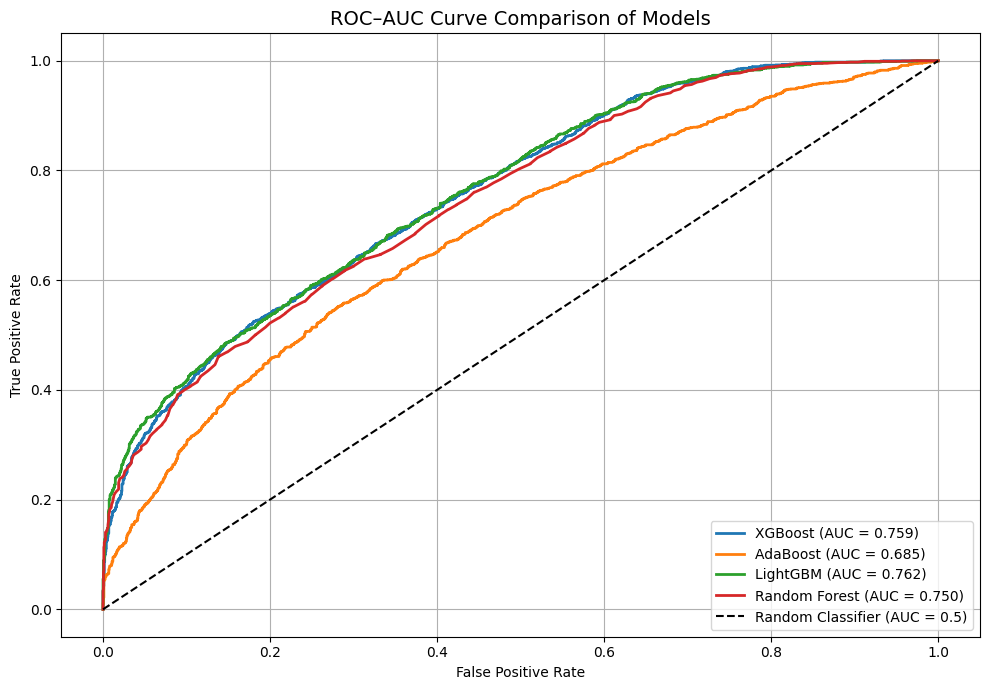


📊 ROC–AUC Scores for All Models:
           Model  ROC–AUC Score
2       LightGBM       0.762027
0        XGBoost       0.758668
3  Random Forest       0.749770
1       AdaBoost       0.685157


In [19]:
import warnings
warnings.filterwarnings("ignore", category=UserWarning)
warnings.filterwarnings("ignore", category=FutureWarning)
warnings.filterwarnings("ignore", message="X does not have valid feature names")

from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Import models
from sklearn.ensemble import AdaBoostClassifier, RandomForestClassifier
from lightgbm import LGBMClassifier
import xgboost as xgb

# Clean feature names for LightGBM
X_lgbm = X_train.copy()
X_lgbm.columns = X_lgbm.columns.str.replace(" ", "_")
X_test_lgbm = X_test.copy()
X_test_lgbm.columns = X_test_lgbm.columns.str.replace(" ", "_")

# Define models (with quiet configurations)

models = {
    "XGBoost": xgb.XGBClassifier(
        n_estimators=100,
        random_state=42,
        eval_metric='logloss',
        verbosity=0,        # Suppress XGBoost logs
        n_jobs=-1
    ),
    "AdaBoost": AdaBoostClassifier(
        n_estimators=100,
        random_state=42
    ),
    "LightGBM": LGBMClassifier(
        n_estimators=200,
        learning_rate=0.05,
        random_state=42,
        verbose=-1,         # Turn off LightGBM logs
        force_col_wise=True # Avoid LightGBM thread warnings
    ),
    "Random Forest": RandomForestClassifier(
        n_estimators=200,
        random_state=42
    )
}

# Plot ROC–AUC for all models
plt.figure(figsize=(10, 7))
roc_auc_scores = {}

for name, model in models.items():
    # Train
    if name == "LightGBM":
        model.fit(X_lgbm, y_train)
        y_prob = model.predict_proba(X_test_lgbm)[:, 1]
    else:
        model.fit(X_train, y_train)
        y_prob = model.predict_proba(X_test)[:, 1]
    
    # Compute ROC metrics
    fpr, tpr, _ = roc_curve(y_test, y_prob)
    auc_score = roc_auc_score(y_test, y_prob)
    roc_auc_scores[name] = auc_score
    
    # Plot ROC curve
    plt.plot(fpr, tpr, lw=2, label=f"{name} (AUC = {auc_score:.3f})")

# Random classifier line
plt.plot([0, 1], [0, 1], 'k--', label='Random Classifier (AUC = 0.5)')

# Customize plot
plt.title('ROC–AUC Curve Comparison of Models', fontsize=14)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='lower right', fontsize=10)
plt.grid(True)
plt.tight_layout()
plt.show()

# ----------------------------------------------------------
# 📊 Print AUC scores
# ----------------------------------------------------------
auc_df = pd.DataFrame(list(roc_auc_scores.items()), columns=['Model', 'ROC–AUC Score'])
auc_df = auc_df.sort_values(by='ROC–AUC Score', ascending=False)
print("\n📊 ROC–AUC Scores for All Models:")
print(auc_df)
